<a href="https://colab.research.google.com/github/saikumartech/Customer-Churn-Prediction-Retention-Dashboard-/blob/main/Customer_Churn_Prediction_%26_Retention_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn Prediction & Retention Dashboard

Welcome to the **Customer Churn Prediction & Retention Dashboard** project. This end-to-end data science solution aims to identify customers who are likely to stop using a service (churn) and provide actionable insights to help businesses retain them.

Problem Statement

In subscription-based industries like telecom, understanding customer churn is critical. Losing customers directly impacts revenue and growth. By analyzing historical customer data, we aim to:

- Predict the likelihood of churn for each customer.
- Identify key drivers behind customer churn.
- Visualize trends and customer segments to support decision-making.

Objectives

- Perform Exploratory Data Analysis (EDA) to understand the dataset.
- Build and evaluate machine learning models to predict churn.
- Visualize churn patterns with an interactive dashboard.
- Provide actionable insights for customer retention strategies.

Tools & Technologies

- **Python**: Data analysis and modeling
- **Pandas, NumPy, Seaborn, Matplotlib**: EDA and visualization
- **Scikit-learn**: Machine learning modeling
- **Streamlit / Power BI**: Interactive dashboard
- **Google Colab**: Notebook environment
- **GitHub**: Version control and project showcase

---


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Copy kaggle.json from Drive to ~/.kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/keys/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install -q kaggle

# Download the dataset
!kaggle datasets download -d blastchar/telco-customer-churn

# Unzip the dataset
!unzip telco-customer-churn.zip


Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


What’s Next?

Data Loading & Initial Exploration

We’ll now:
Load the dataset using Pandas.
Preview the data: See the first few rows, understand columns, check the shape, and get a feel for the dataset.

In [2]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show shape and first five rows
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('customerID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Partner').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('PhoneService').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customerID')):
  _plot_series(series, series_name, i)
  fig.legend(title='customerID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Partner')):
  _plot_series(series, series_name, i)
  fig.legend(title='Partner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('PhoneService')):
  _plot_series(series, series_name, i)
  fig.legend(title='PhoneService', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gender'].value_counts()
    for x_label, grp in _df_16.groupby('customerID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customerID')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Partner'].value_counts()
    for x_label, grp in _df_17.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('Partner')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PhoneService'].value_counts()
    for x_label, grp in _df_18.groupby('Partner')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Partner')
_ = plt.ylabel('PhoneService')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MultipleLines'].value_counts()
    for x_label, grp in _df_19.groupby('PhoneService')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PhoneService')
_ = plt.ylabel('MultipleLines')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['customerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='customerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Partner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='Partner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['PhoneService'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='PhoneService', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
# Get a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Count missing values in each column
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


SO NO MISSING VALUES NO NULL, DATA IS CLEAN AND SO WE ARE MOVING AHEAD WITH EDA!

In [5]:
# Look at column names and data types
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
# Check unique values in 'Churn' column
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


<ipython-input-7-97085dc7d07b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


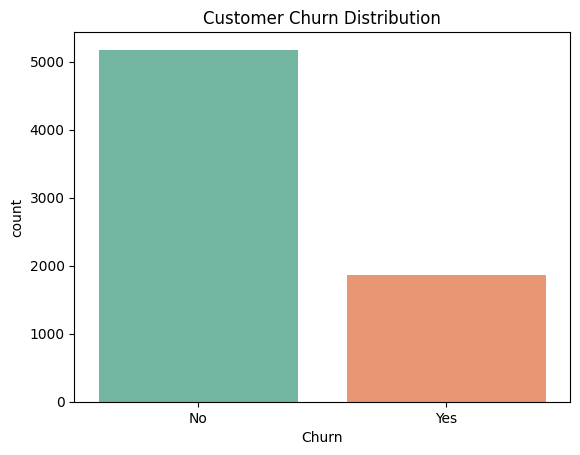

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()


Next Interpreatation

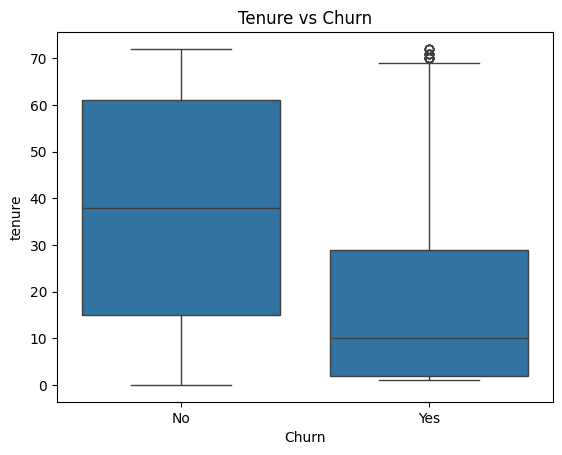

In [8]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure vs Churn")
plt.show()


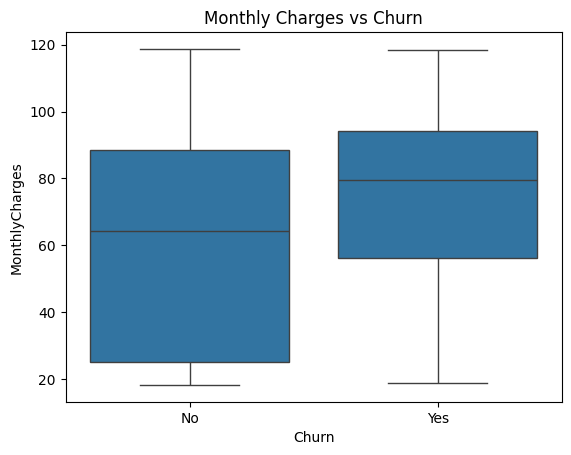

In [9]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()


Churn Rates By Categorical Columns


By Contact Type

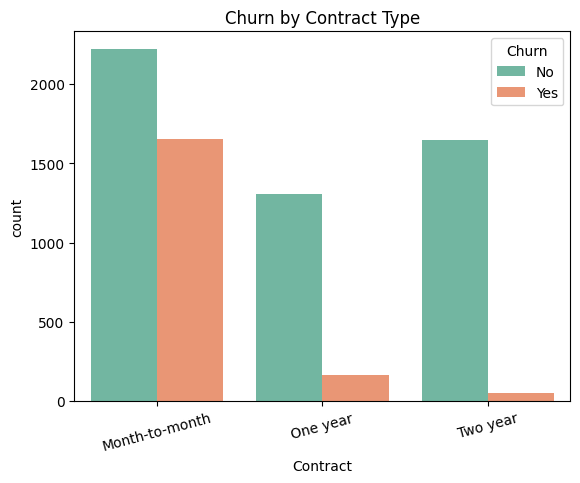

In [10]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()


BY Payment Method

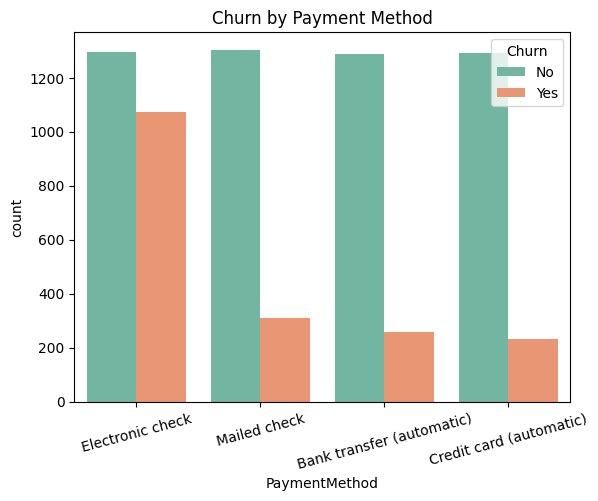

In [11]:
 sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title("Churn by Payment Method")
plt.xticks(rotation=15)
plt.show()


By Internet Service

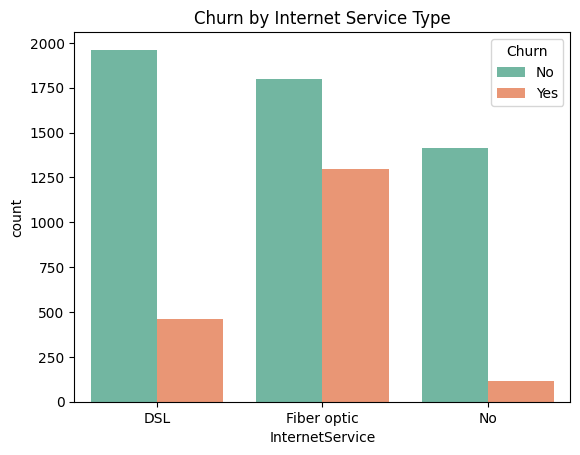

In [12]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title("Churn by Internet Service Type")
plt.show()


Correlation and Feature Relationship

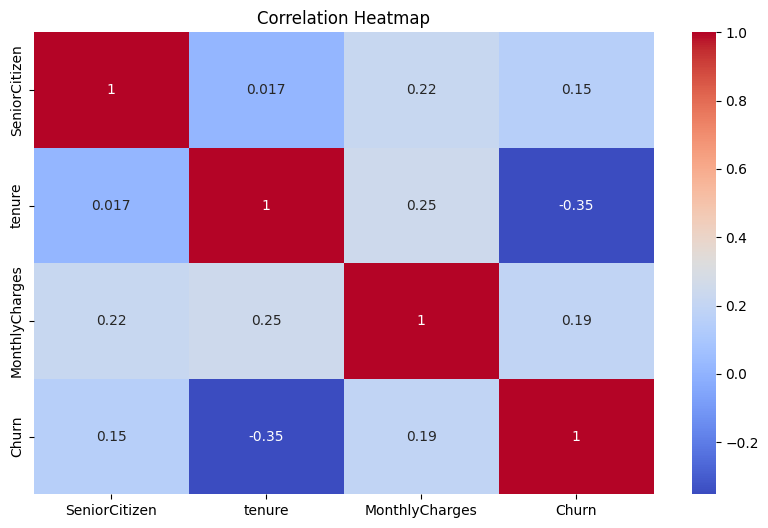

In [14]:
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Data Pre Processing

Drop Irrelavant and Problamatic coloums

In [15]:
df.drop('customerID', axis=1, inplace=True)


Convert Total Charges to numeric

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing TotalCharges:", df['TotalCharges'].isnull().sum())


Missing TotalCharges: 11


In [17]:
df.dropna(subset=['TotalCharges'], inplace=True)


Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [20]:
df = pd.get_dummies(df, drop_first=True)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numeric_features] = scaler.fit_transform(df[numeric_features])


Splitting the Dataset

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
